In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.9/603.9 kB 14.4 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Sun Jul 16 06:48:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


Training the dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/traffic sign detection

/content/drive/MyDrive/traffic sign detection


In [ ]:
!ls

data  data.yaml  runs  Untitled0.ipynb	yolov8s.pt


In [22]:
#training the data

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace

In [23]:
!ls runs/detect/train6/

args.yaml					    train_batch121.jpg
confusion_matrix.png				    train_batch122.jpg
events.out.tfevents.1689491292.1a5c3e33ffc4.6000.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch120.jpg				    weights


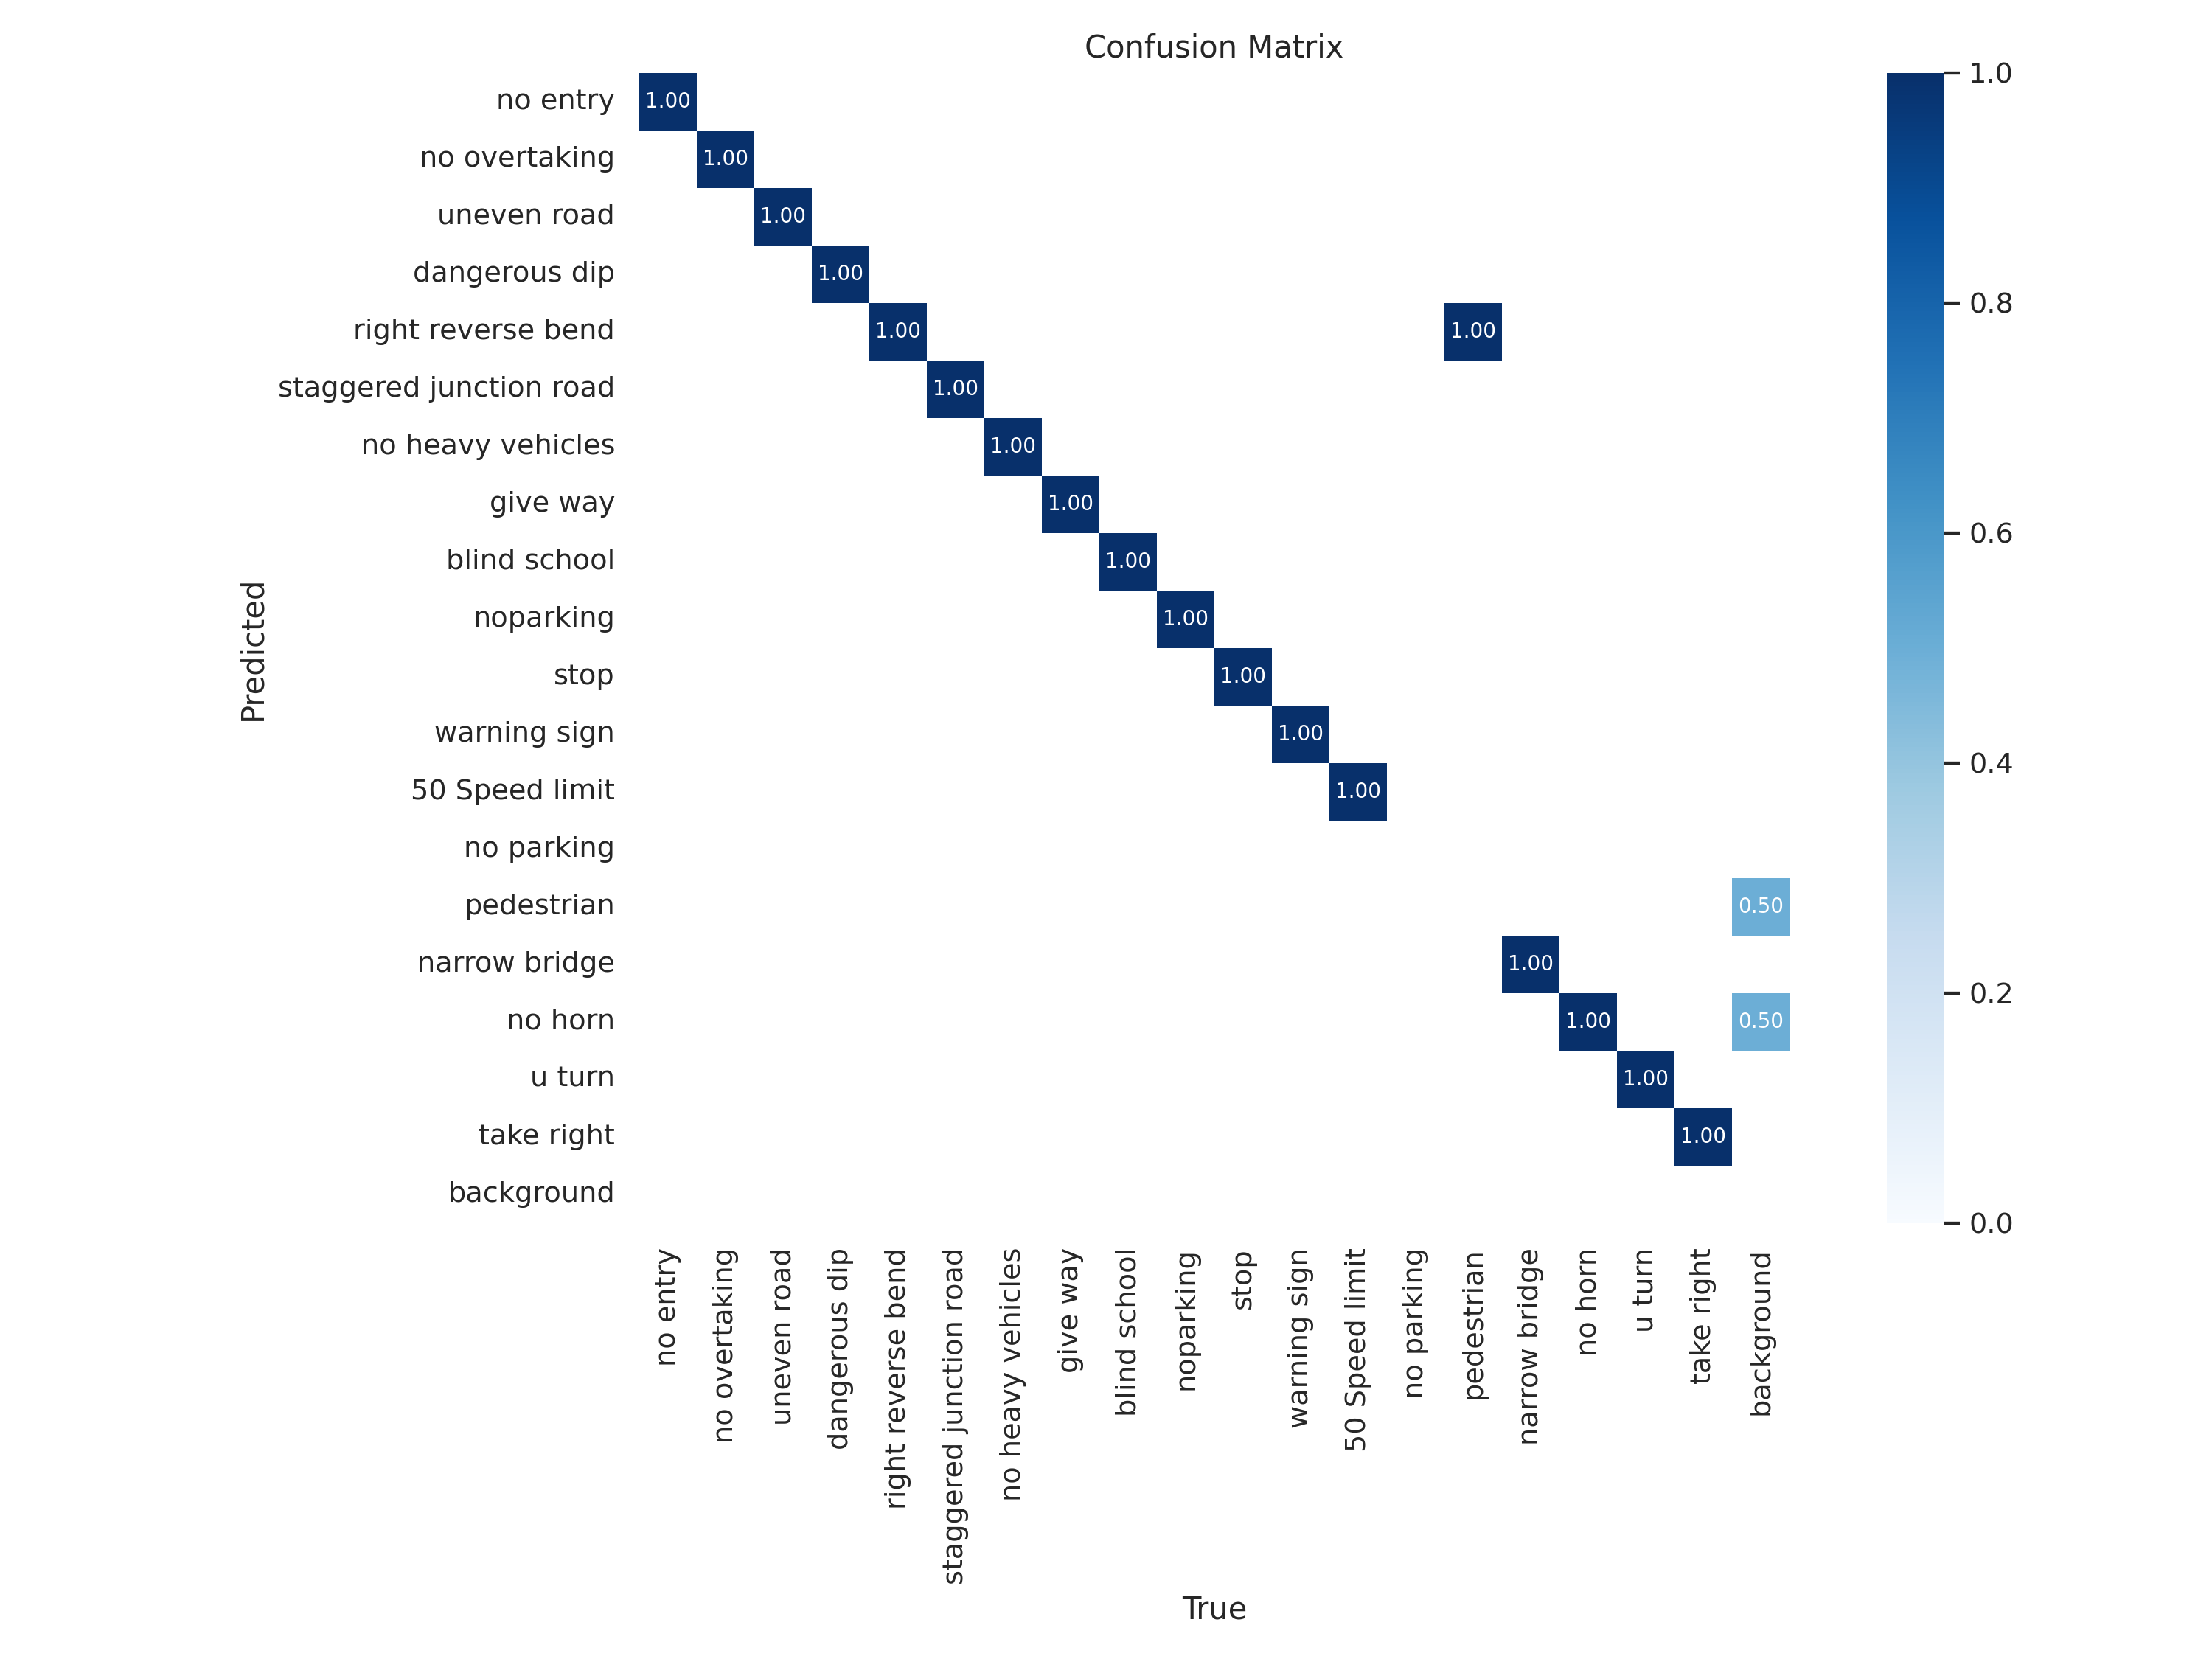

In [25]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/traffic sign detection/runs/detect/train6/confusion_matrix.png",width=800)

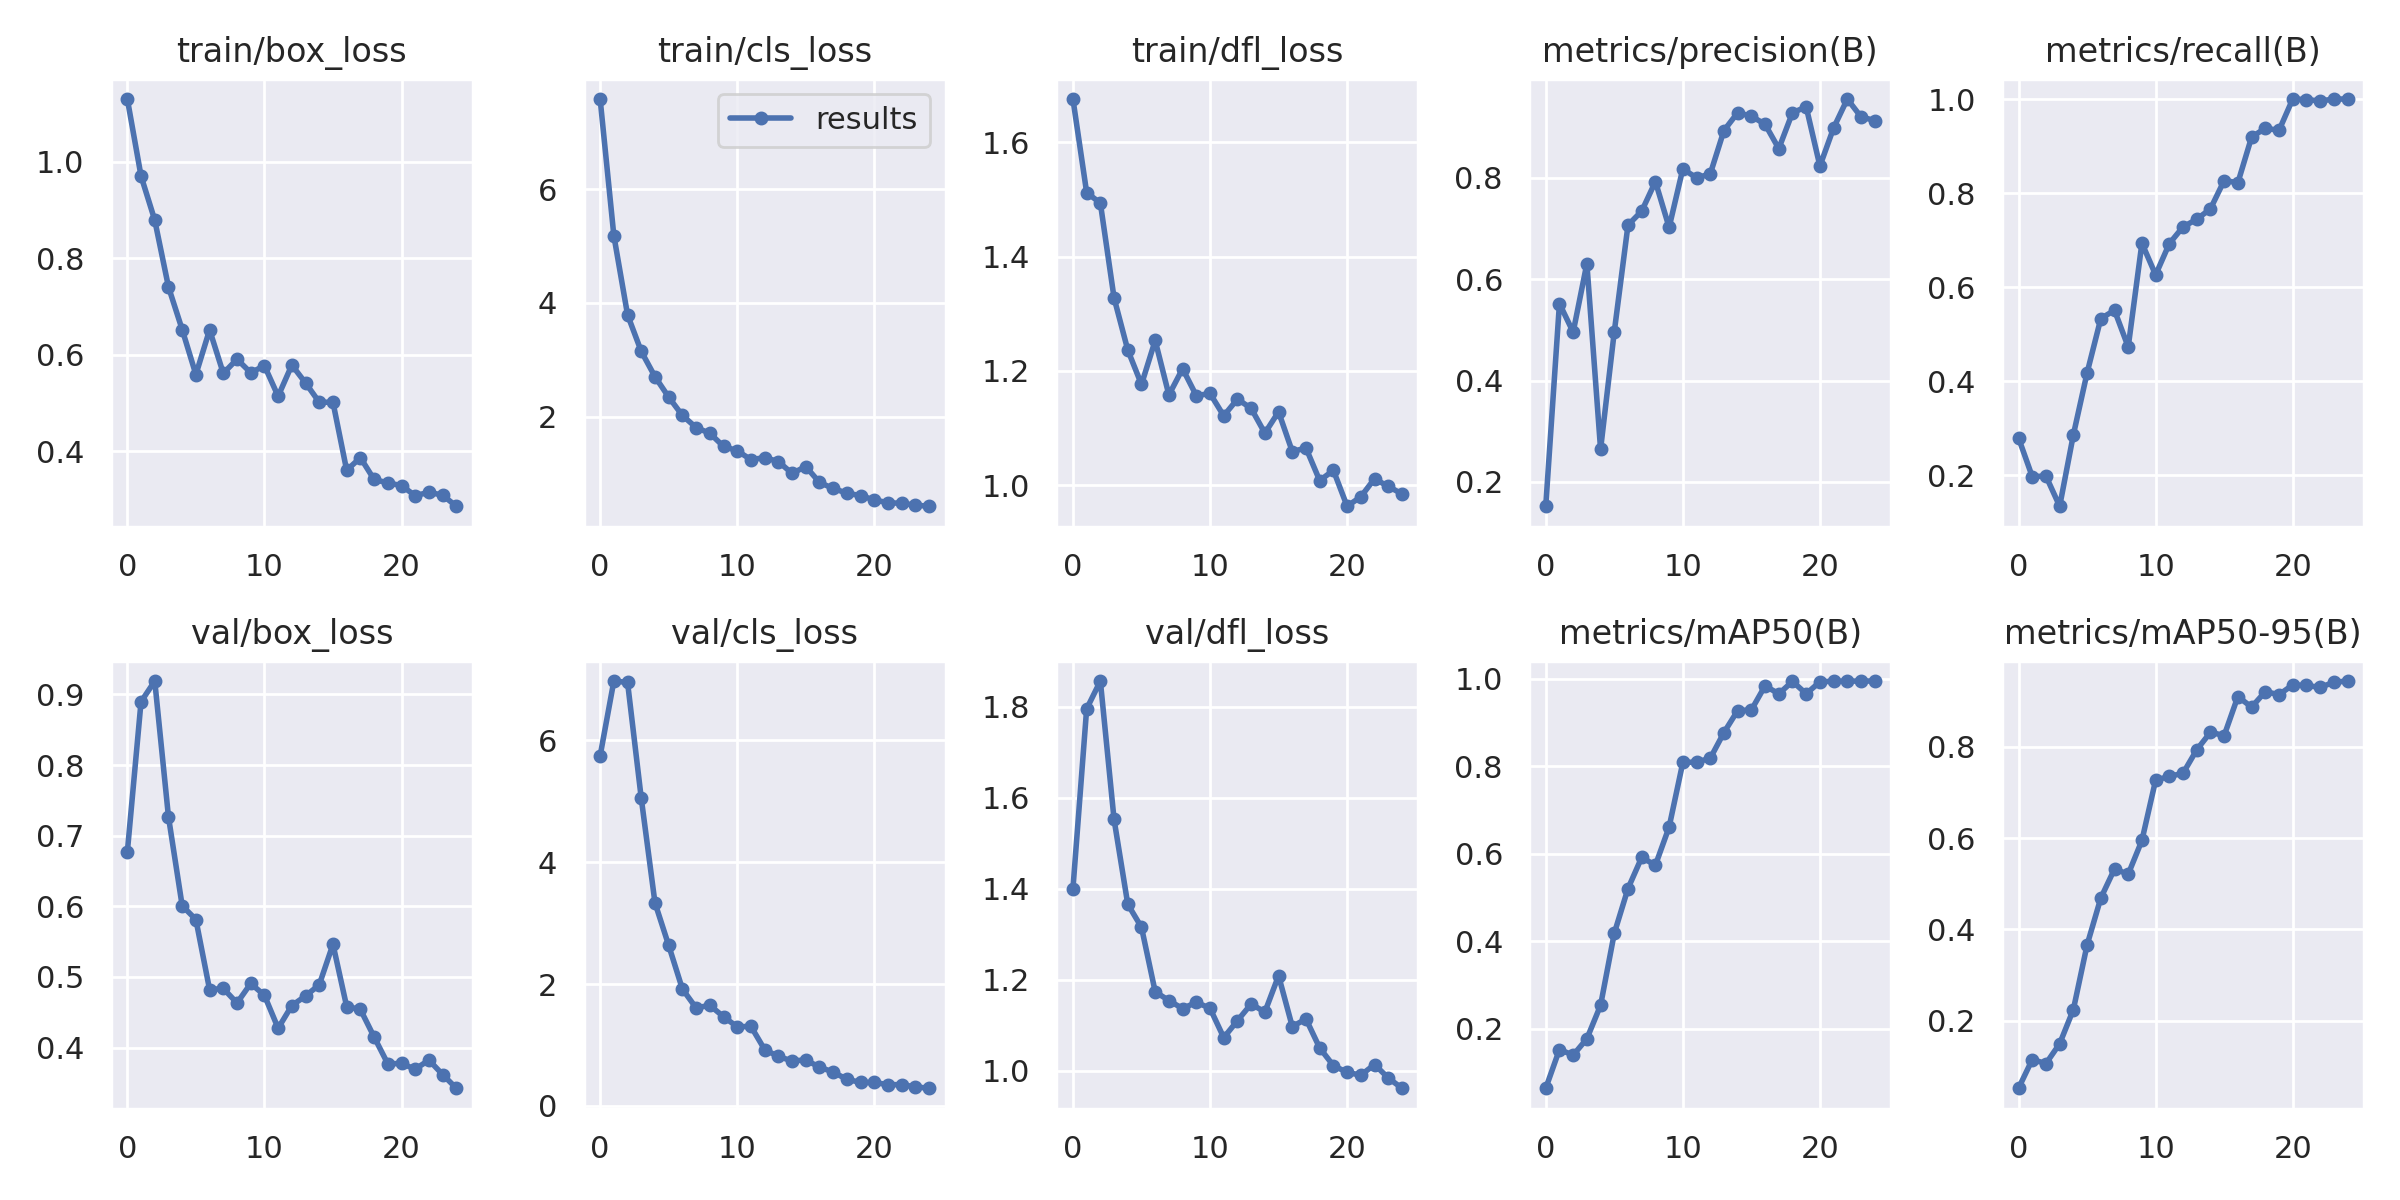

In [26]:
Image(filename="/content/drive/MyDrive/traffic sign detection/runs/detect/train6/results.png",width=800)

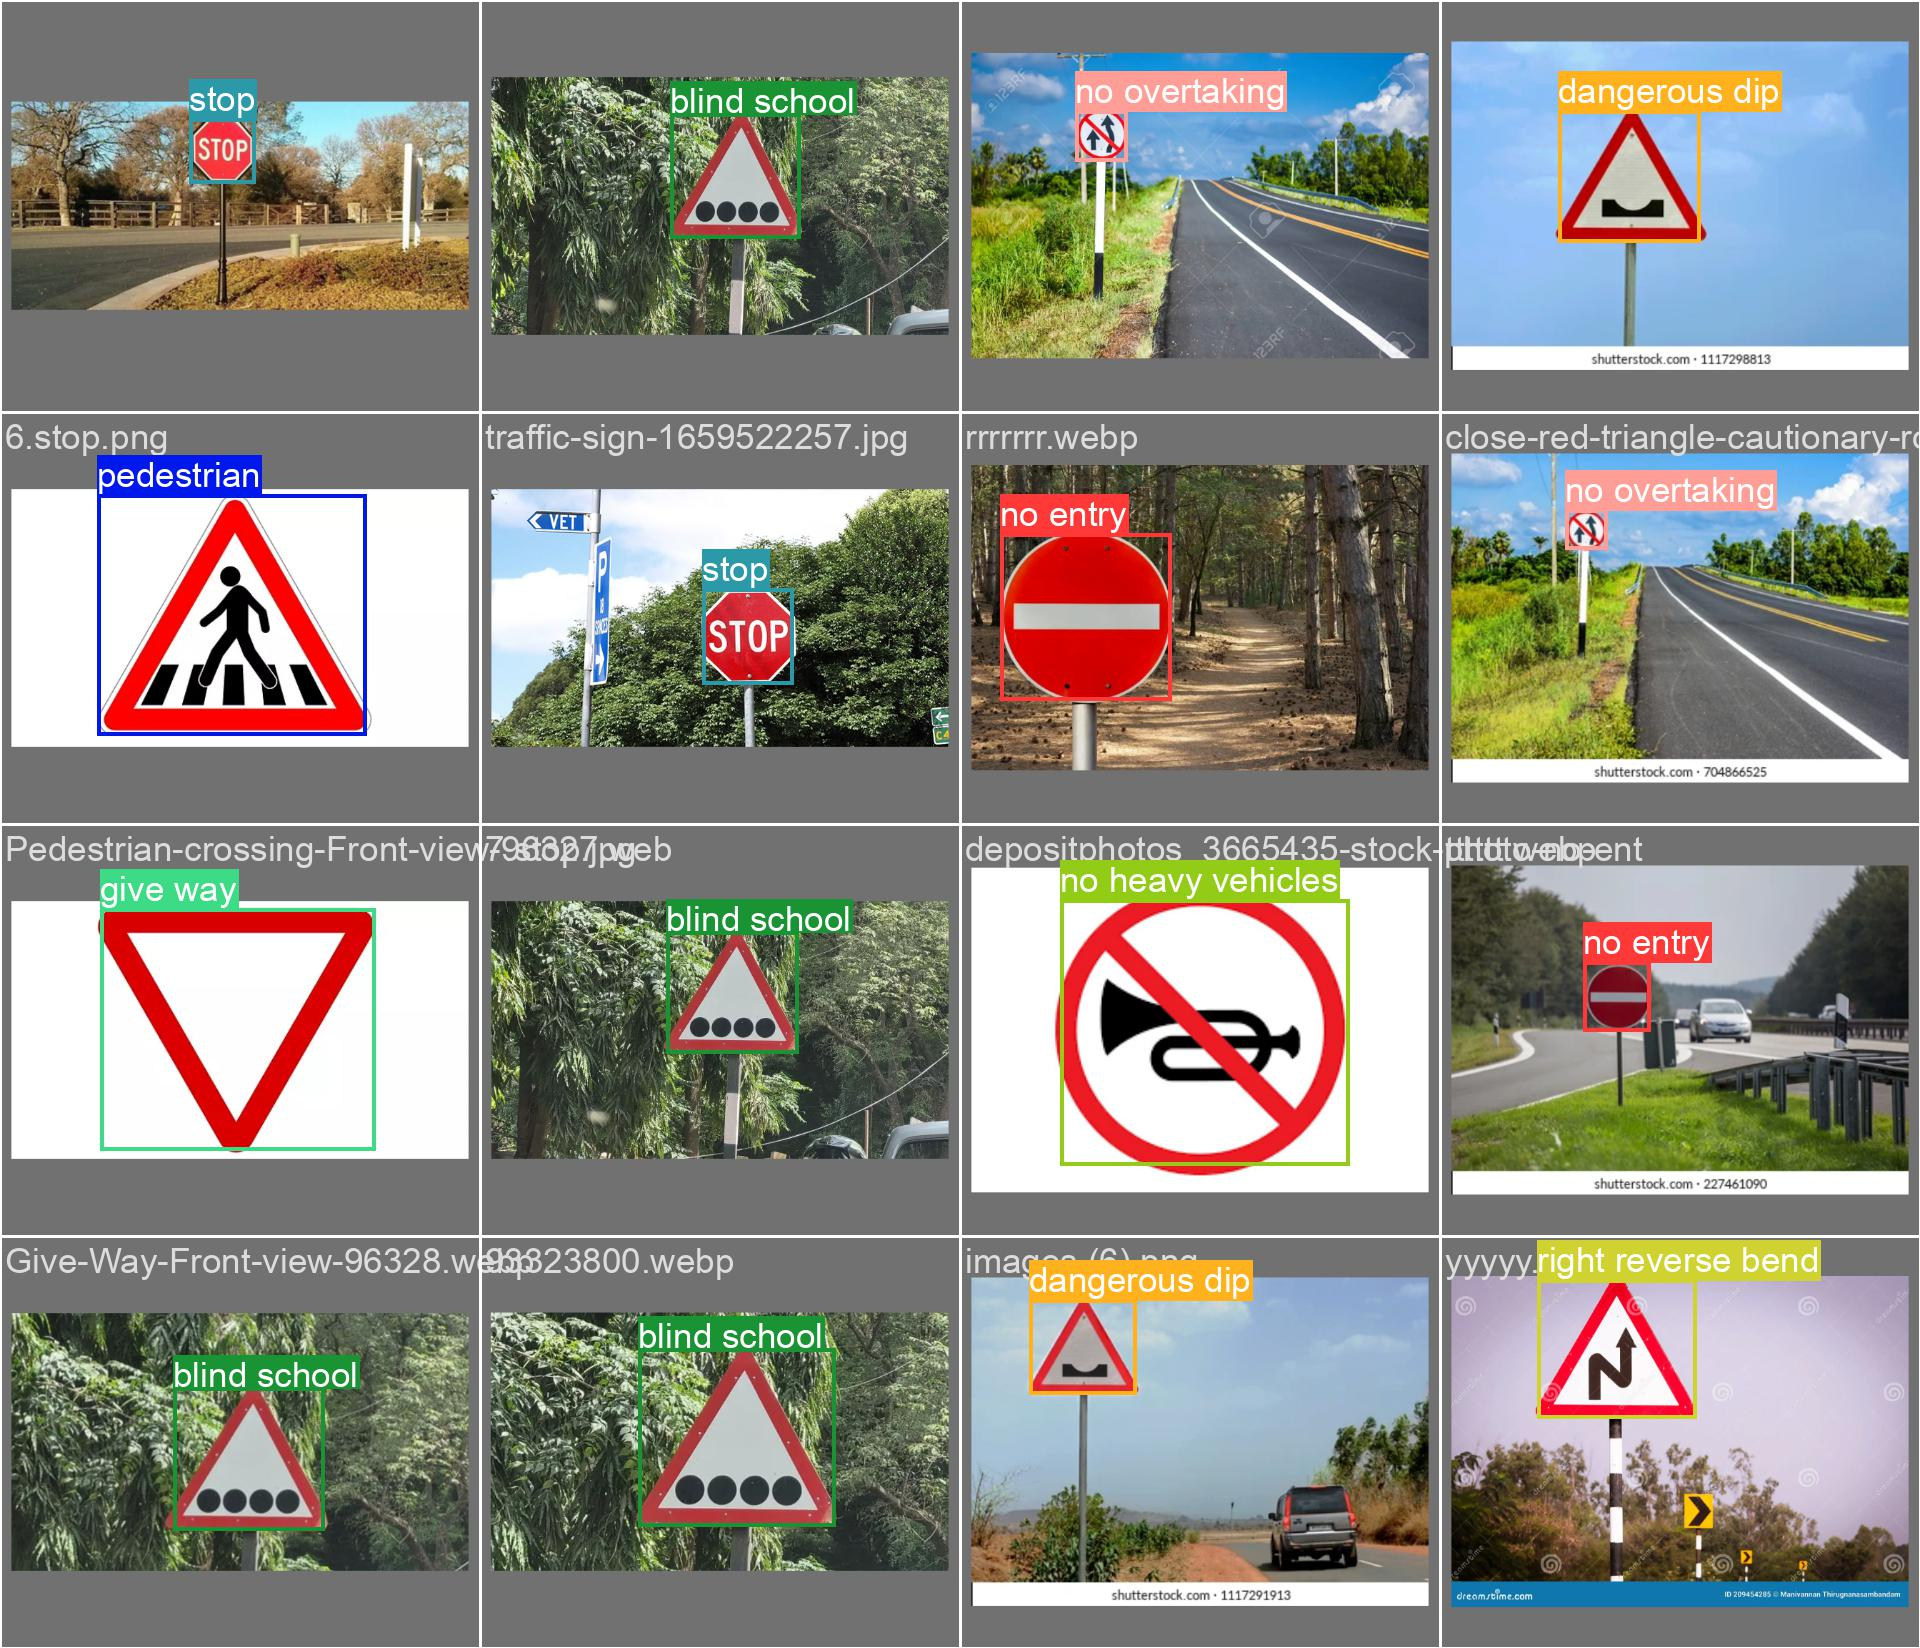

In [28]:
Image(filename="/content/drive/MyDrive/traffic sign detection/runs/detect/train6/val_batch0_labels.jpg",width=800)

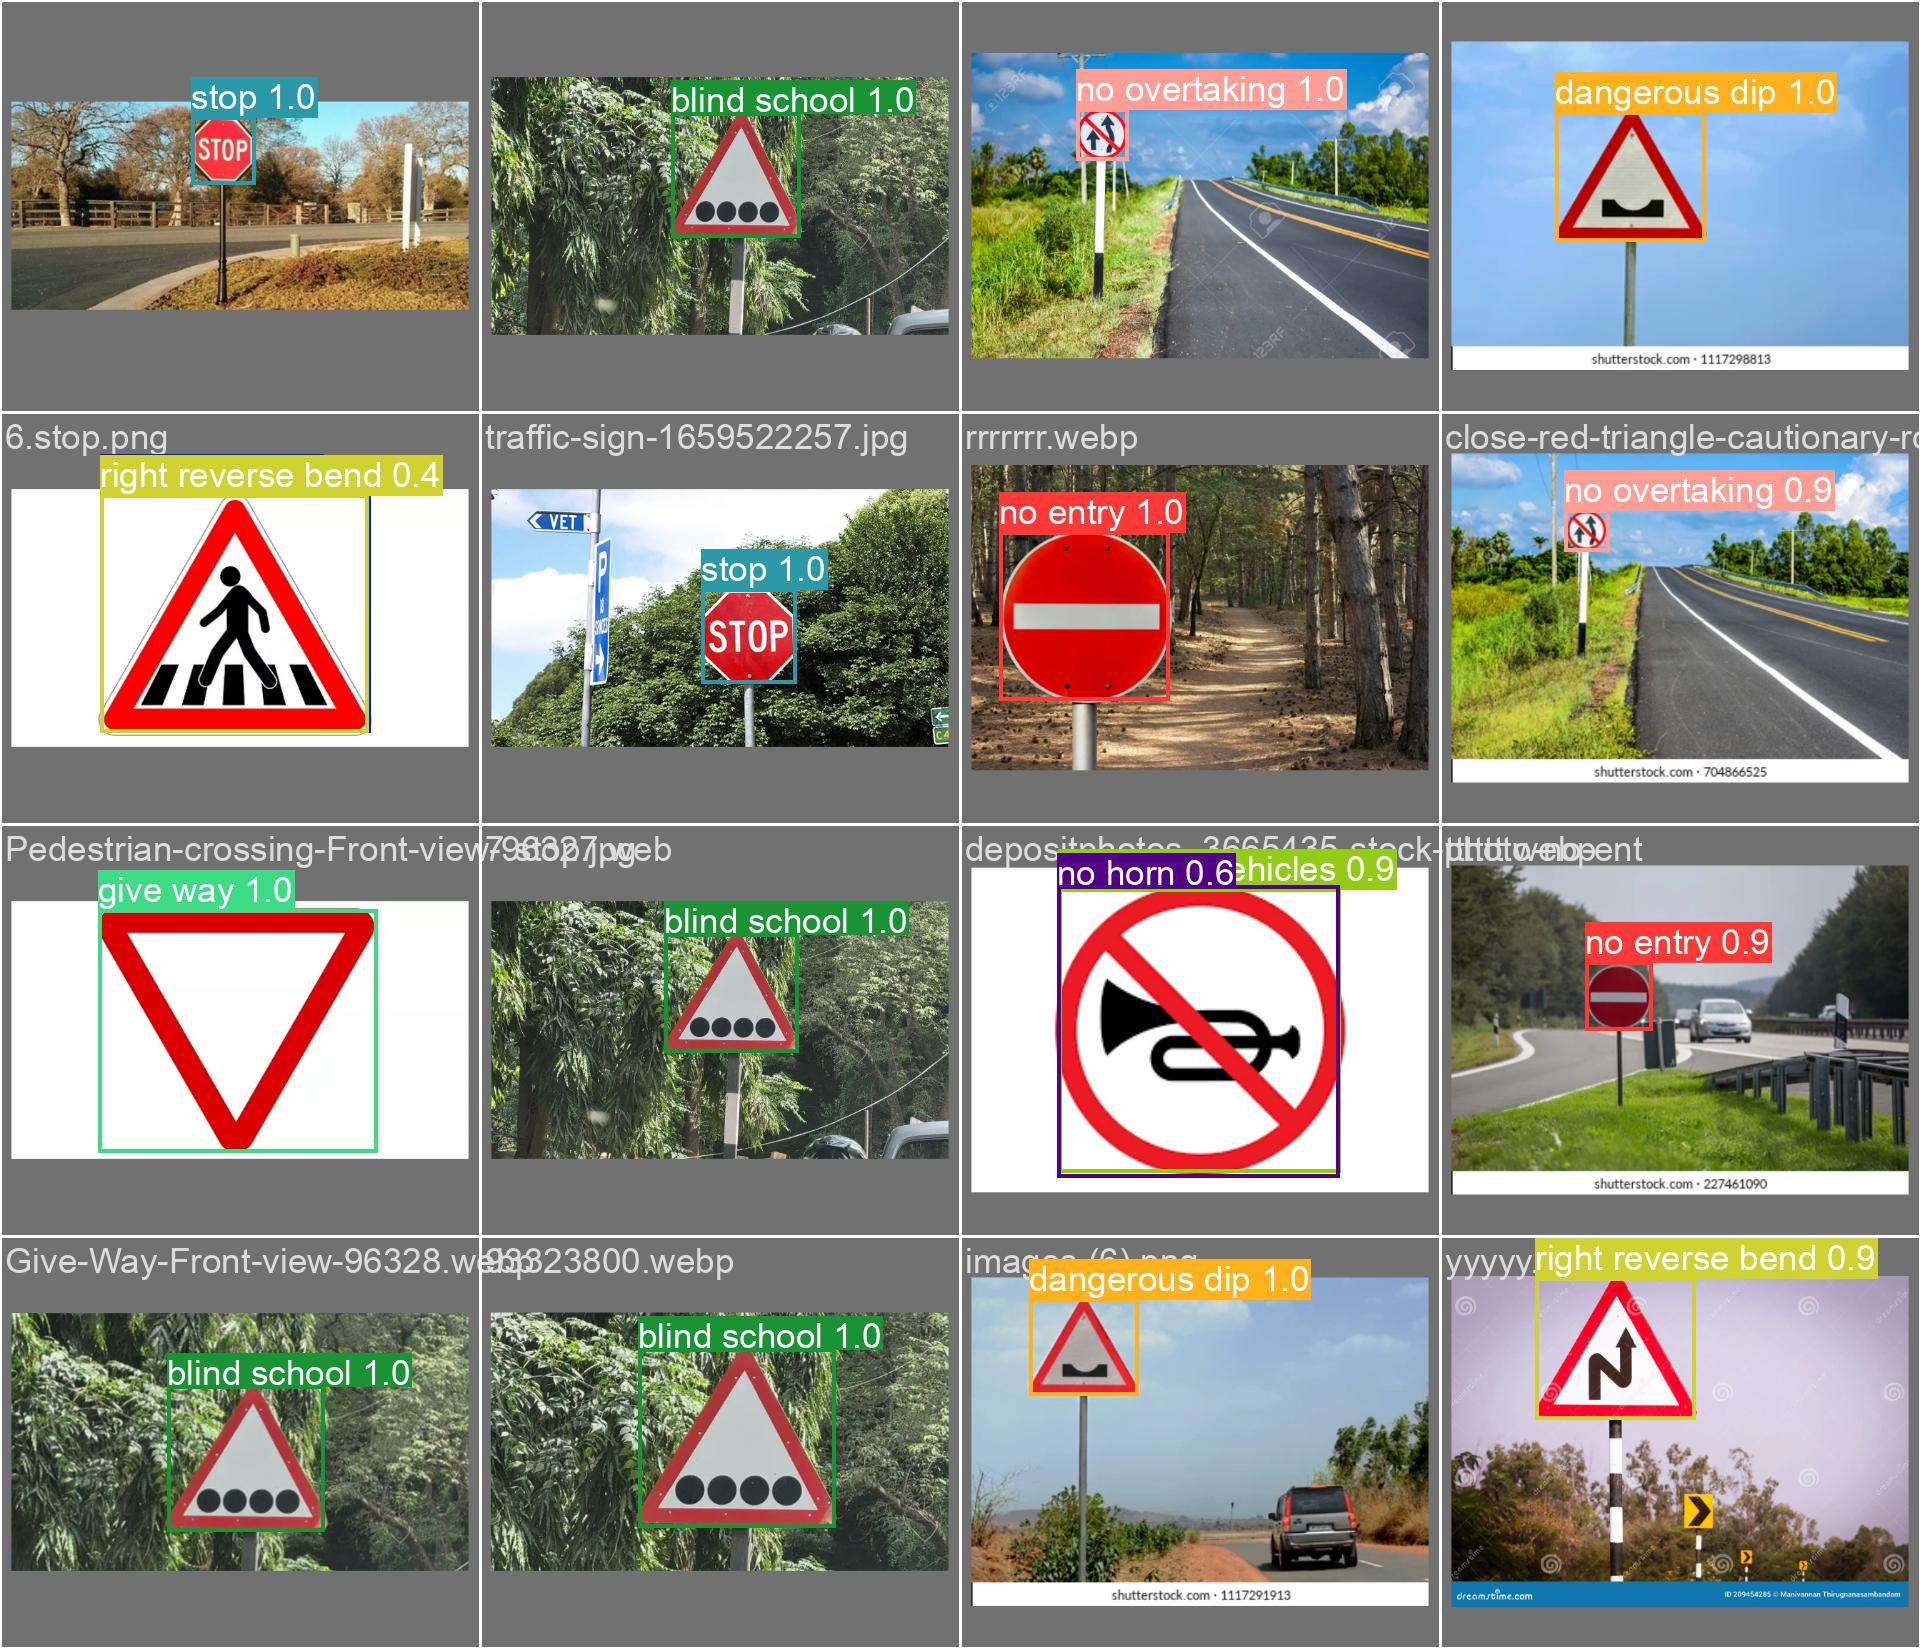

In [29]:
Image(filename="/content/drive/MyDrive/traffic sign detection/runs/detect/train6/val_batch0_pred.jpg",width=900)

In [4]:
pwd

'/content'

In [10]:
%cd /content/drive/MyDrive/traffic sign detection

/content/drive/MyDrive/traffic sign detection


In [6]:
#validation
!yolo task=detect mode=val model="/content/drive/MyDrive/traffic sign detection/runs/detect/train6/weights/best.pt" data=data.yaml epochs=25 imgsz=640 plots=True

2023-07-16 07:39:54.566355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 07:39:55.491291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132937 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/traffic sign detection/data/val/labels.cache... 125 images, 0 backgrounds, 0 corrupt: 100% 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:08<00:00,  1.01s/it]
                   all        125        125       0.98          1      0.995      0.941
              no entry

In [7]:
#predictions
!yolo task=detect mode=predict model="/content/drive/MyDrive/traffic sign detection/runs/detect/train7/weights/best.pt" conf=0.25 source=data/test/images

2023-07-16 07:41:20.190449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 07:41:21.100379: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11132937 parameters, 0 gradients, 28.5 GFLOPs
image 1/125 /content/drive/MyDrive/traffic sign detection/data/test/images/1.stop.webp: 640x640 1 stop, 16.4ms
image 2/125 /content/drive/MyDrive/traffic sign detection/data/test/images/10.stop.png: 640x480 1 stop, 169.4ms
image 3/125 /content/drive/MyDrive/traffic sign detection/data/test/images/1bca45cef6b162b8e6938d2182163a77.png: 576x640 1 uneven road, 79.8ms
image 4/125 /content/d

In [12]:
pwd

'/content/drive/MyDrive/traffic sign detection'

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob("runs/detect/predict/*.jpg")[:3]:  # Close the parenthesis after glob.glob call
    display(Image(filename=image_path, width=600))
    print("\n")
